In [ ]:
%pwd


'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 
import skimage.transform
from scipy.ndimage import zoom
from skimage import exposure
from scipy import ndimage
import os
import shutil 
import nibabel as nib
import pandas as pd 

In [ ]:
nn = 150

In [ ]:
# data(immagini) -> img
for i in range(nn):
   if os.path.isfile('/content/drive/MyDrive/data/case_00{:03d}/imaging.nii.gz'.format(i)):
    os.rename('/content/drive/MyDrive/data/case_00{:03d}/imaging.nii.gz'.format(i), '/content/drive/MyDrive/data/case_00{:03d}/image_00{:03d}.nii.gz'.format(i, i)) #rinomino file per poter salvare tutte le img in una unica cartella e riconoscerle
    shutil.move('/content/drive/MyDrive/data/case_00{:03d}/image_00{:03d}.nii.gz'.format(i, i), '/content/drive/MyDrive/img') #sposto le immagini in una nuova cartella contenente tutte le immagini
   else: i+1

# data(maschere) -> mask
for i in range(nn):
  if os.path.isfile('/content/drive/MyDrive/data/case_00{:03d}/segmentation.nii.gz'.format(i)):
   os.rename('/content/drive/MyDrive/data/case_00{:03d}/segmentation.nii.gz'.format(i), '/content/drive/MyDrive/data/case_00{:03d}/mask_00{:03d}.nii.gz'.format(i, i)) #rinomino file per poter salvare tutte le mask in una unica cartella e riconoscerle
   shutil.move('/content/drive/MyDrive/data/case_00{:03d}/mask_00{:03d}.nii.gz'.format(i, i), '/content/drive/MyDrive/mask') #sposto le mask in una nuova cartella contenente tutte le mask
  else: i+1

In [ ]:
# Load and visualize data
dataInputPath = '/content/drive/MyDrive/'
imagePathInput = os.path.join(dataInputPath, 'img/')
maskPathInput = os.path.join(dataInputPath, 'mask/')

#output path 
dataOutputPath = 'content/drive/MyDrive/slices'
imageSliceOutput = os.path.join(dataOutputPath, 'img/')
maskSliceOutput = os.path.join(dataOutputPath, 'mask/')

In [ ]:
# Load image and see max min Hounsfield units
imgPath = os.path.join(imagePathInput, 'image_00009.nii.gz')
img = nib.load(imgPath).get_fdata()
np.min(img), np.max(img), img.shape, type(img)

(-1024.0, 1374.0, (77, 512, 512), numpy.ndarray)

In [ ]:
# Load image mask and see max min Hounsfield units
maskPath = os.path.join(maskPathInput, 'mask_00009.nii.gz')
mask = nib.load(maskPath).get_fdata()
np.min(mask), np.max(mask), mask.shape, type(mask), 

(0.0, 2.0, (77, 512, 512), numpy.ndarray)

Visualize the slice number 80


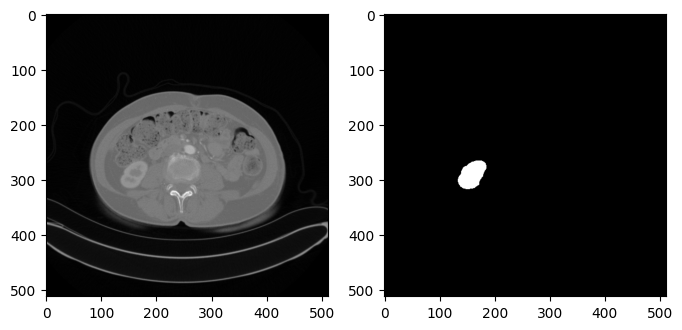

In [ ]:
# Show image slice
imgSlice = img[60,:,:]
maskSlice = mask[60,:,:]
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
plt.imshow(imgSlice, cmap='gray')
a = fig.add_subplot(1,2,2)
plt.imshow(maskSlice, cmap = 'gray')

In [ ]:
def show_slice_window(slice, level, window):
   """
   Function to display an image slice
   Input is a numpy 2D array
   """
   max = level + window/2
   min = level - window/2
   slice = slice.clip(min,max)
   return slice


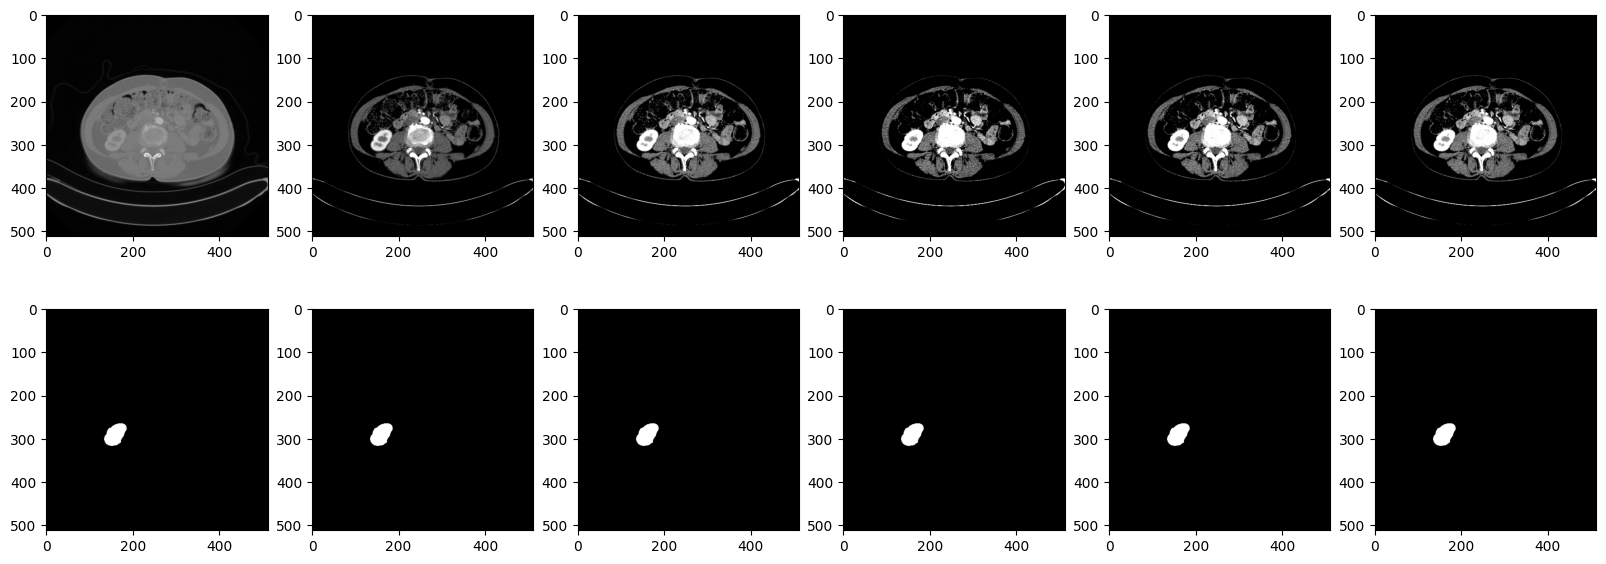

In [ ]:
# Show different slices window
window = [380, 225, 150, 175, 200]
level = [115, 70, 70, 70, 70]
fig = plt.figure(figsize=(20,7))
fig.add_subplot(2,6,1)
plt.imshow(imgSlice, cmap='gray')
a = fig.add_subplot(2,6,7)
plt.imshow(maskSlice, cmap = 'gray')
for i in range(5):
  fig.add_subplot(2,6,i+2)
  plt.imshow(show_slice_window(imgSlice, level[i], window[i]), cmap="gray")
  fig.add_subplot(2,6,i+8)
  plt.imshow(show_slice_window(maskSlice, level[i], window[i]), cmap="gray")



Dimension of the CT and the voxel


In [ ]:
# Data exploration: Shape and voxel (mask)
for i in range(nn):
 maskPath = os.path.join(maskPathInput, 'mask_00{:03d}.nii.gz'.format(i))
 mask = nib.load(maskPath)
 print("Shape patient {}:".format(i), mask.shape)
 sx, sy, sz = mask.header.get_zooms()
 print("Voxel dimension {}:".format(i), sx, sy, sz)

Shape patient 0: (611, 512, 512)
Voxel dimension 0: 0.5 0.9199219 0.9199219
Shape patient 1: (602, 512, 512)
Voxel dimension 1: 0.5 0.7988281 0.7988281
Shape patient 2: (261, 512, 512)
Voxel dimension 2: 1.0 0.9394531 0.9394531
Shape patient 3: (270, 512, 512)
Voxel dimension 3: 1.0 0.85546875 0.85546875
Shape patient 4: (64, 512, 512)
Voxel dimension 4: 4.0 0.9765625 0.9765625
Shape patient 5: (834, 512, 512)
Voxel dimension 5: 0.5 0.9765625 0.9765625
Shape patient 6: (157, 512, 512)
Voxel dimension 6: 3.0 0.7421875 0.7421875
Shape patient 7: (61, 512, 512)
Voxel dimension 7: 3.0 0.9394531 0.9394531
Shape patient 8: (227, 512, 512)
Voxel dimension 8: 3.0 0.81640625 0.81640625
Shape patient 9: (77, 512, 512)
Voxel dimension 9: 3.0 0.80859375 0.80859375
Shape patient 10: (50, 512, 512)
Voxel dimension 10: 3.0 0.7578125 0.7578125
Shape patient 11: (80, 512, 512)
Voxel dimension 11: 5.0 0.703125 0.703125
Shape patient 12: (89, 512, 512)
Voxel dimension 12: 5.0 0.7519531 0.7519531
Shape pa

In [ ]:
# Data exploration: Shape and voxel (img)
for i in range(nn):
 imgPath = os.path.join(imagePathInput, 'image_00{:03d}.nii.gz'.format(i))
 img = nib.load(imgPath)
 print("Shape patient {}:".format(i), img.shape)
 sx, sy, sz = img.header.get_zooms()
 print("Voxel dimension {}:".format(i), sx, sy, sz)


Shape patient 0: (611, 512, 512)
Voxel dimension 0: 0.5 0.9199219 0.9199219
Shape patient 1: (602, 512, 512)
Voxel dimension 1: 0.5 0.7988281 0.7988281
Shape patient 2: (261, 512, 512)
Voxel dimension 2: 1.0 0.9394531 0.9394531
Shape patient 3: (270, 512, 512)
Voxel dimension 3: 1.0 0.85546875 0.85546875
Shape patient 4: (64, 512, 512)
Voxel dimension 4: 4.0 0.9765625 0.9765625
Shape patient 5: (834, 512, 512)
Voxel dimension 5: 0.5 0.9765625 0.9765625
Shape patient 6: (157, 512, 512)
Voxel dimension 6: 3.0 0.7421875 0.7421875
Shape patient 7: (61, 512, 512)
Voxel dimension 7: 3.0 0.9394531 0.9394531
Shape patient 8: (227, 512, 512)
Voxel dimension 8: 3.0 0.81640625 0.81640625
Shape patient 9: (77, 512, 512)
Voxel dimension 9: 3.0 0.80859375 0.80859375
Shape patient 10: (50, 512, 512)
Voxel dimension 10: 3.0 0.7578125 0.7578125
Shape patient 11: (80, 512, 512)
Voxel dimension 11: 5.0 0.703125 0.703125
Shape patient 12: (89, 512, 512)
Voxel dimension 12: 5.0 0.7519531 0.7519531
Shape pa

Calcolo media e mediana delle dimensioni dei voxel 


In [ ]:
x_dim_mask = []
y_dim_mask = [] 
z_dim_mask = []
dim_mask = []
for i in range(nn):
 maskPath = os.path.join(maskPathInput, 'mask_00{:03d}.nii.gz'.format(i))
 mask = nib.load(maskPath)
 dim_mask.insert(i, mask.shape)
 sx_mask, sy_mask, sz_mask = mask.header.get_zooms()
 x_dim_mask.insert(i, sx_mask)
 y_dim_mask.insert(i, sy_mask)
 z_dim_mask.insert(i, sz_mask)

dim_mask = np.array(dim_mask)

print("IMAGE")
print("MEAN:")
print("dim_1:", np.mean(dim_mask[:,0]))
print("dim_2:", np.mean(dim_mask[:,1]))
print("dim_3:", np.mean(dim_mask[:,2]))
print("sx:", np.mean(x_dim_mask))
print("sy:", np.mean(y_dim_mask))
print("sz:", np.mean(z_dim_mask))
print("^^^^^^^^^^^^^^^^^^^")
print("MEDIAN:")
print("dim_1:", np.median(dim_mask[:,0]))
print("dim_2:", np.median(dim_mask[:,1]))
print("dim_3:", np.median(dim_mask[:,2]))
print("sx:", np.median(x_dim_mask))
print("sy:", np.median(y_dim_mask))
print("sz:", np.median(z_dim_mask))




IMAGE
MEAN:
dim_1: 213.40666666666667
dim_2: 512.0
dim_3: 512.0
sx: 3.0583334
sy: 0.8020888
sz: 0.8020888
^^^^^^^^^^^^^^^^^^^
MEDIAN:
dim_1: 108.0
dim_2: 512.0
dim_3: 512.0
sx: 3.0
sy: 0.7988281
sz: 0.7988281


In [ ]:
x_dim_img = []
y_dim_img = [] 
z_dim_img = []
dim_img = []
for i in range(nn):
 imgPath = os.path.join(imagePathInput, 'image_00{:03d}.nii.gz'.format(i))
 img = nib.load(imgPath)
 dim_img.insert(i, img.shape)
 sx_img, sy_img, sz_img = img.header.get_zooms()
 x_dim_img.insert(i, sx_img)
 y_dim_img.insert(i, sy_img)
 z_dim_img.insert(i, sz_img)

dim_img = np.array(dim_img)

print("IMAGE")
print("MEAN:")
print("dim_1:", np.mean(dim_img[:,0]))
print("dim_2:", np.mean(dim_img[:,1]))
print("dim_3:", np.mean(dim_img[:,2]))
print("sx:", np.mean(x_dim_img))
print("sy:", np.mean(y_dim_img))
print("sz:", np.mean(z_dim_img))
print("^^^^^^^^^^^^^^^^^^^")
print("MEDIAN:")
print("dim_1:", np.median(dim_img[:,0]))
print("dim_2:", np.median(dim_img[:,1]))
print("dim_3:", np.median(dim_img[:,2]))
print("sx:", np.median(x_dim_img))
print("sy:", np.median(y_dim_img))
print("sz:", np.median(z_dim_img))

#print(dim)
#print("x_dim", x_dim)
#print("y_dim", y_dim)
#print("z_dim", z_dim)



IMAGE
MEAN:
dim_1: 213.40666666666667
dim_2: 512.0
dim_3: 512.0
sx: 3.0583334
sy: 0.8020888
sz: 0.8020888
^^^^^^^^^^^^^^^^^^^
MEDIAN:
dim_1: 108.0
dim_2: 512.0
dim_3: 512.0
sx: 3.0
sy: 0.7988281
sz: 0.7988281


In [ ]:
x_dim_img = np.array(x_dim_img)
y_dim_img = np.array(y_dim_img)
z_dim_img = np.array(z_dim_img)

x_dim_mask = np.array(x_dim_mask)
y_dim_mask = np.array(y_dim_mask)
z_dim_mask = np.array(z_dim_mask)


Decido la target resolution e target shape


In [ ]:
target_resolution = [3.16, 1.58, 1.58]
target_shape = [128, 256, 256]

In [ ]:
# Load and visualize reshaped and resize data
dataInputPath_IR = '/content/drive/MyDrive/isotr_reshaped'
imagePathInput_IR = os.path.join(dataInputPath_IR, 'img/')
maskPathInput_IR = os.path.join(dataInputPath_IR, 'mask/')

In [ ]:
import os
os.mkdir("/content/drive/MyDrive/isotr_reshaped/img")
os.mkdir("/content/drive/MyDrive/isotr_reshaped/mask")

In [ ]:
# Reshape and resampling
# img -> isotr_reshaped/img
# delete img in the original folder 'img'
for i in range(nn):
 imgPath = os.path.join(imagePathInput, 'image_00{:03d}.nii.gz'.format(i))
 img = nib.load(imgPath)
 sx, sy, sz = img.header.get_zooms()
 print(sx, sy, sz)
 tac_img = img.get_fdata()

 scale_vector = (sx/target_resolution[0], sy/target_resolution[1], sz/target_resolution[2])
 isotr_img = skimage.transform.rescale(tac_img, scale_vector, order=3, preserve_range=True,  mode='constant')
 isotr_img_shape = isotr_img.shape


 factors = (
           target_shape[0]/isotr_img_shape[0],
           target_shape[1]/isotr_img_shape[1], 
           target_shape[2]/isotr_img_shape[2]
           )
 isotr_reshaped_img = zoom (isotr_img, factors, order=3, mode= 'nearest')
 reshaped_img_shape = isotr_reshaped_img.shape
 print ('Reshaped image shape: ', reshaped_img_shape)
 print(i)

 paziente = np.save(os.path.join(imagePathInput_IR, 'image_00{:03d}'.format(i)), isotr_reshaped_img)
 os.remove(os.path.join(imagePathInput, 'image_00{:03d}.nii.gz'.format(i)))


0.5 0.9199219 0.9199219
Reshaped image shape:  (128, 256, 256)
0
0.5 0.7988281 0.7988281
Reshaped image shape:  (128, 256, 256)
1
1.0 0.9394531 0.9394531
Reshaped image shape:  (128, 256, 256)
2
1.0 0.85546875 0.85546875
Reshaped image shape:  (128, 256, 256)
3
4.0 0.9765625 0.9765625
Reshaped image shape:  (128, 256, 256)
4
0.5 0.9765625 0.9765625
Reshaped image shape:  (128, 256, 256)
5
3.0 0.7421875 0.7421875
Reshaped image shape:  (128, 256, 256)
6
3.0 0.9394531 0.9394531
Reshaped image shape:  (128, 256, 256)
7
3.0 0.81640625 0.81640625
Reshaped image shape:  (128, 256, 256)
8
3.0 0.80859375 0.80859375
Reshaped image shape:  (128, 256, 256)
9
3.0 0.7578125 0.7578125
Reshaped image shape:  (128, 256, 256)
10
5.0 0.703125 0.703125
Reshaped image shape:  (128, 256, 256)
11
5.0 0.7519531 0.7519531
Reshaped image shape:  (128, 256, 256)
12
3.0 0.68359375 0.68359375
Reshaped image shape:  (128, 256, 256)
13
1.0 0.8496094 0.8496094
Reshaped image shape:  (128, 256, 256)
14
3.0 0.7050781 

In [ ]:
# Reshape and resampling
# mask -> isotr_reshaped/mask
# delete mask in the original folder 'mask'
for i in range(nn):
 maskPath = os.path.join(maskPathInput, 'mask_00{:03d}.nii.gz'.format(i))
 mask = nib.load(maskPath)
 sx, sy, sz = mask.header.get_zooms()
 print(sx, sy, sz)
 tac_mask = mask.get_fdata()

 scale_vector = (sx/target_resolution[0], sy/target_resolution[1], sz/target_resolution[2])
 isotr_mask = skimage.transform.rescale(tac_mask, scale_vector, order=0, preserve_range=True,  mode='constant')
 isotr_mask_shape = isotr_mask.shape

 factors = (
           target_shape[0]/isotr_mask_shape[0],
           target_shape[1]/isotr_mask_shape[1], 
           target_shape[2]/isotr_mask_shape[2]
           )
 isotr_reshaped_mask = zoom (isotr_mask, factors, order=0, mode= 'nearest')
 reshaped_mask_shape = isotr_reshaped_mask.shape
 print ('Reshaped mask shape: ', reshaped_mask_shape)
 print(i)

 paziente = np.save(os.path.join(maskPathInput_IR, 'mask_00{:03d}'.format(i)), isotr_reshaped_mask)
 os.remove(os.path.join(maskPathInput, 'mask_00{:03d}.nii.gz'.format(i)))

0.5 0.9199219 0.9199219
Reshaped mask shape:  (128, 256, 256)
0
0.5 0.7988281 0.7988281
Reshaped mask shape:  (128, 256, 256)
1
1.0 0.9394531 0.9394531
Reshaped mask shape:  (128, 256, 256)
2
1.0 0.85546875 0.85546875
Reshaped mask shape:  (128, 256, 256)
3
4.0 0.9765625 0.9765625
Reshaped mask shape:  (128, 256, 256)
4
0.5 0.9765625 0.9765625
Reshaped mask shape:  (128, 256, 256)
5
3.0 0.7421875 0.7421875
Reshaped mask shape:  (128, 256, 256)
6
3.0 0.9394531 0.9394531
Reshaped mask shape:  (128, 256, 256)
7
3.0 0.81640625 0.81640625
Reshaped mask shape:  (128, 256, 256)
8
3.0 0.80859375 0.80859375
Reshaped mask shape:  (128, 256, 256)
9
3.0 0.7578125 0.7578125
Reshaped mask shape:  (128, 256, 256)
10
5.0 0.703125 0.703125
Reshaped mask shape:  (128, 256, 256)
11
5.0 0.7519531 0.7519531
Reshaped mask shape:  (128, 256, 256)
12
3.0 0.68359375 0.68359375
Reshaped mask shape:  (128, 256, 256)
13
1.0 0.8496094 0.8496094
Reshaped mask shape:  (128, 256, 256)
14
3.0 0.7050781 0.7050781
Resha

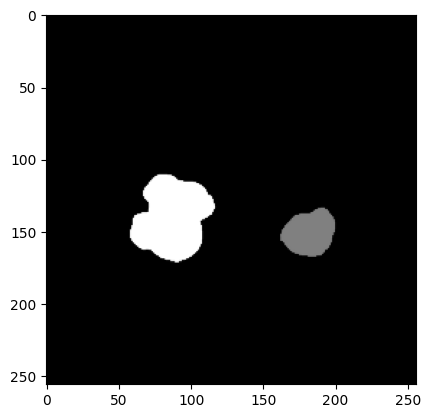

In [ ]:
# Visualization
mask = np.load(os.path.join(maskPathInput_IR, 'mask_00008.npy'))
maskSlice_IR = mask[70,:,:]
plt.imshow(maskSlice_IR, cmap = 'gray')

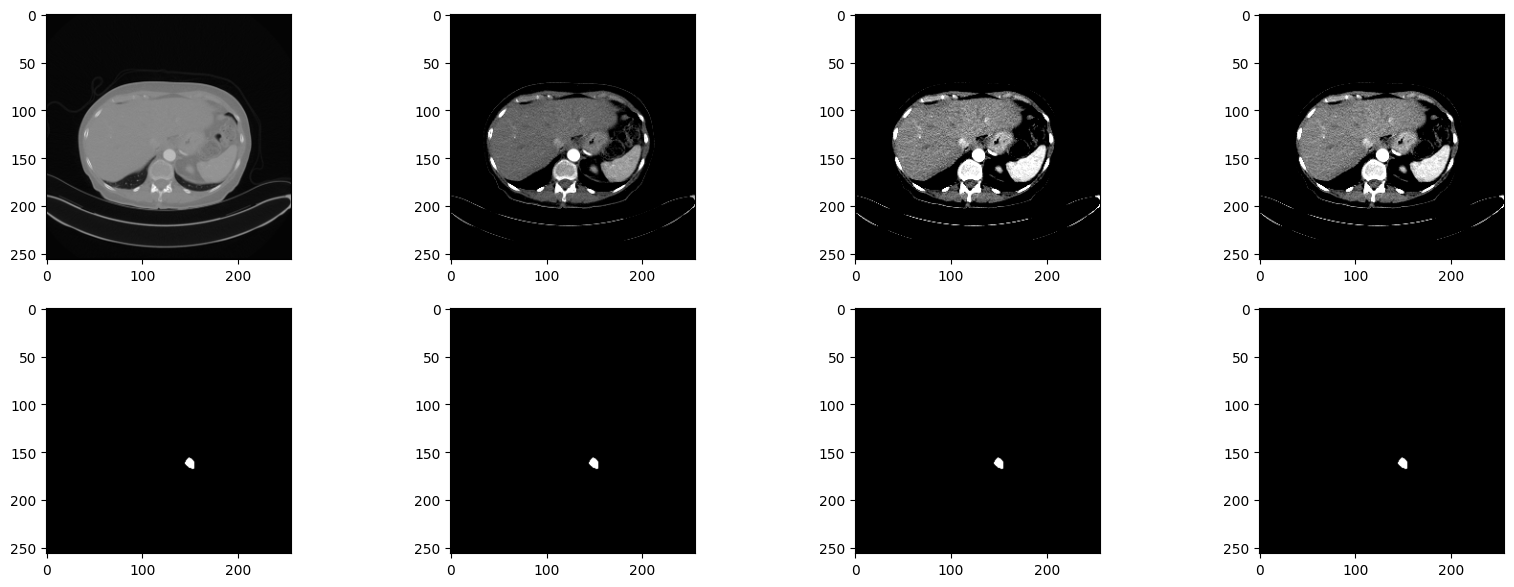

In [ ]:
# Load image mask and see max min Hounsfield units
img = np.load(os.path.join(imagePathInput_IR, 'image_00009.npy'))
mask = np.load(os.path.join(maskPathInput_IR, 'mask_00009.npy'))

imgSlice_IR = img[33,:,:]
maskSlice_IR = mask[33,:,:]
window = [380, 175, 200]
level = [110, 70, 70]
fig = plt.figure(figsize=(20,7))
fig.add_subplot(2,4,1)
plt.imshow(imgSlice_IR, cmap='gray')
a = fig.add_subplot(2,4,5)
plt.imshow(maskSlice_IR, cmap = 'gray')
for i in range(3):
  fig.add_subplot(2,4,i+2)
  plt.imshow(show_slice_window(imgSlice_IR, level[i], window[i]), cmap="gray")
  fig.add_subplot(2,4,i+6)
  plt.imshow(show_slice_window(maskSlice_IR, level[i], window[i]), cmap="gray")

In [ ]:
# Windowing the img
level = 110
window = 380
for i in range(nn):
   path = np.load(os.path.join(imagePathInput_IR, 'image_00{:03d}.npy'.format(i)))
   for j in range (128):
    path[j,:,:] = show_slice_window(path[j,:,:], level, window)

   np.save(os.path.join(imagePathInput_IR, 'image_00{:03d}'.format(i)), path)



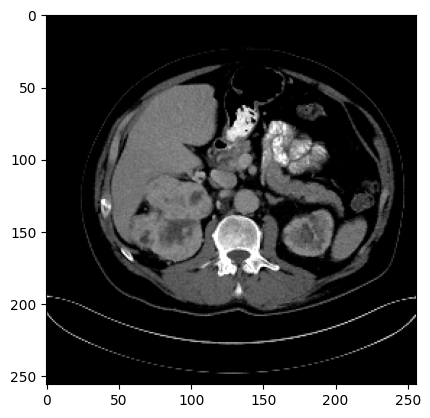

In [ ]:
img = np.load(os.path.join(imagePathInput_IR, 'image_00008.npy'))
imgSlice_IR = img[70,:,:]
plt.imshow(imgSlice_IR, cmap='gray')

In [ ]:
# Windowing the mask
for i in range(nn):
   path = np.load(os.path.join(maskPathInput_IR, 'mask_00{:03d}.npy'.format(i)))
   for j in range (128):
    path[j,:,:] = show_slice_window(path[j,:,:], level, window)
   np.save(os.path.join(maskPathInput_IR, 'mask_00{:03d}'.format(i)), path)

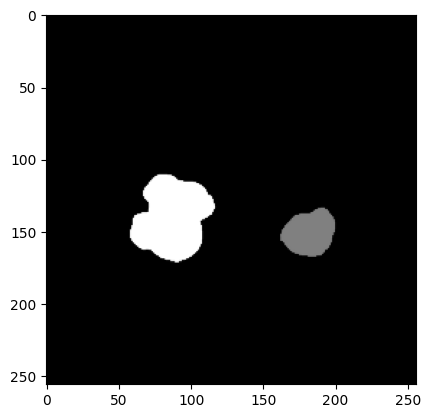

In [ ]:
mask = np.load(os.path.join(maskPathInput_IR, 'mask_00008.npy'))
maskSlice_IR = mask[70,:,:]
plt.imshow(maskSlice_IR, cmap = 'gray')

In [ ]:
import os, glob
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K


In [ ]:
def normalize_voxel_intensity(volume):
    for i in range(volume.shape[0]):
        for j in range(volume.shape[1]):
            for k in range(volume.shape[2]):
                if volume[i, j, k] <= 0.5:
                    volume[i, j, k] = 0
                elif volume[i, j, k] <= 1.5:
                    volume[i, j, k] = 1
                else:
                    volume[i, j, k] = 2
    return volume


In [ ]:
# Check for the class of the mask (some mask has 1.99999 instead of 2)
for i in range(nn):
 mask = np.load(os.path.join(maskPathInput_IR, 'mask_00{:03d}.npy'.format(i)))
 n_mask = normalize_voxel_intensity(mask)
 print(i, np.min(n_mask), np.max(n_mask), type(n_mask))
 np.save(os.path.join(maskPathInput_IR, 'mask_00{:03d}'.format(i)), n_mask)

0 0.0 2.0 <class 'numpy.ndarray'>
1 0.0 2.0 <class 'numpy.ndarray'>
2 0.0 2.0 <class 'numpy.ndarray'>
3 0.0 2.0 <class 'numpy.ndarray'>
4 0.0 2.0 <class 'numpy.ndarray'>
5 0.0 2.0 <class 'numpy.ndarray'>
6 0.0 2.0 <class 'numpy.ndarray'>
7 0.0 2.0 <class 'numpy.ndarray'>
8 0.0 2.0 <class 'numpy.ndarray'>
9 0.0 2.0 <class 'numpy.ndarray'>
10 0.0 2.0 <class 'numpy.ndarray'>
11 0.0 2.0 <class 'numpy.ndarray'>
12 0.0 2.0 <class 'numpy.ndarray'>
13 0.0 2.0 <class 'numpy.ndarray'>
14 0.0 2.0 <class 'numpy.ndarray'>
15 0.0 2.0 <class 'numpy.ndarray'>
16 0.0 2.0 <class 'numpy.ndarray'>
17 0.0 2.0 <class 'numpy.ndarray'>
18 0.0 2.0 <class 'numpy.ndarray'>
19 0.0 2.0 <class 'numpy.ndarray'>
20 0.0 2.0 <class 'numpy.ndarray'>
21 0.0 2.0 <class 'numpy.ndarray'>
22 0.0 2.0 <class 'numpy.ndarray'>
23 0.0 2.0 <class 'numpy.ndarray'>
24 0.0 2.0 <class 'numpy.ndarray'>
25 0.0 2.0 <class 'numpy.ndarray'>
26 0.0 2.0 <class 'numpy.ndarray'>
27 0.0 2.0 <class 'numpy.ndarray'>
28 0.0 2.0 <class 'numpy.ndarr

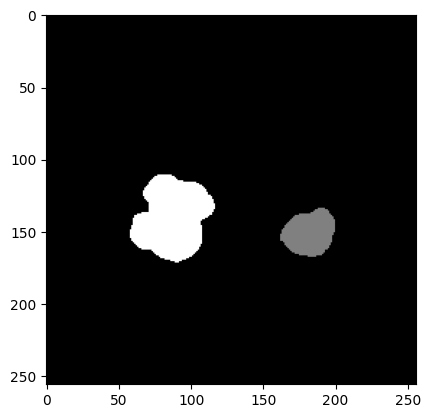

In [ ]:
mask = np.load(os.path.join(maskPathInput_IR, 'mask_00008.npy'))
maskSlice_IR = mask[70,:,:]
plt.imshow(maskSlice_IR, cmap = 'gray')

In [ ]:
# Normalize image
def normalizeImageIntensityRange(img, level, window):
    max = level + window/2
    min = level - window/2
    img[img < min] = min
    img[img > max] = max
    return (img - min) / (max-min)



0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>


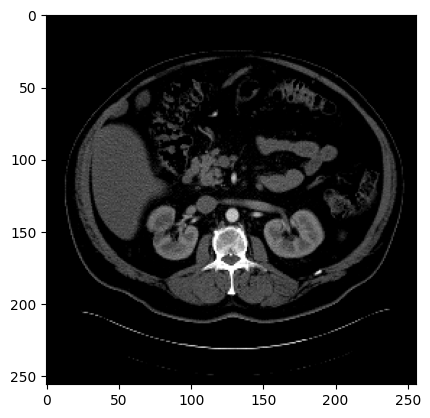

In [ ]:
# Visualization
img = np.load(os.path.join(imagePathInput_IR, 'image_00007.npy'.format(i)))
n_img = normalizeImageIntensityRange(img, level, window)
imgSlice = n_img[67,:,:]
plt.imshow(imgSlice, cmap = 'gray')
print(np.min(n_img), np.max(n_img), n_img.shape, type(n_img))


In [ ]:
# Normalization of the images
level = 110
window = 380
for i in range(nn):
 img = np.load(os.path.join(imagePathInput_IR, 'image_00{:03d}.npy'.format(i)))
 n_img = normalizeImageIntensityRange(img, level, window)
 print(i, np.min(n_img), np.max(n_img), n_img.shape, type(n_img))
 np.save(os.path.join(imagePathInput_IR, 'image_00{:03d}'.format(i)), n_img)


0 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
1 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
2 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
3 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
4 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
5 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
6 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
7 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
8 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
9 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
10 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
11 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
12 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
13 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
14 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
15 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
16 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
17 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
18 0.0 1.0 (128, 256, 256) <class 'numpy.ndarray'>
19 0.0 1.0 (128, 256, 256) <class 'numpy.

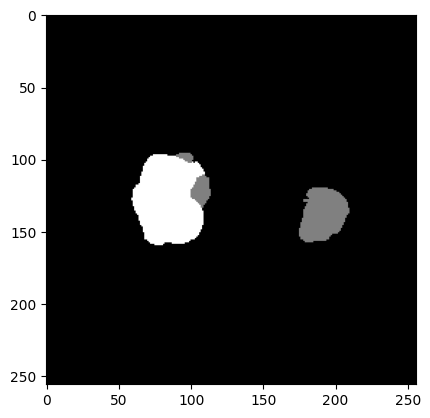

In [ ]:
maskk = np.load('/content/drive/MyDrive/isotr_reshaped/mask/mask_00008.npy')
plt.imshow(maskk[80,:,:], cmap='gray')

FINO A QUI

In [ ]:
slicePathInput = '/content/drive/MyDrive/slices'
imageSliceInput = os.path.join(slicePathInput, 'img/')
maskSliceInput = os.path.join(slicePathInput, 'mask/')

In [ ]:
os.mkdir("/content/drive/MyDrive/slices/img")
os.mkdir("/content/drive/MyDrive/slices/mask") #

In [ ]:
# Slice image in all directions 
def sliceAndSaveVolumeImage(vol, i, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    for j in range(dimx):
      sl = vol[j,:,:]
      np.save(os.path.join(path, '00{:03d}_slice{:03d}'.format(i, j)), sl)

In [ ]:
# Read and process image volumes
# isotr_reshaped/img -> slices/img
for i in range(nn):
    img = np.load(os.path.join(imagePathInput_IR, 'image_00{:03d}.npy'.format(i)))
    print(img.shape, np.sum(img.shape), np.min(img), np.max(img))
    sliceAndSaveVolumeImage(img, i, imageSliceInput)

(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256
(128, 256, 256) 640 0.0 1.0
128 256 256


In [ ]:
# Read and process mask volumes
# isotr_reshaped/mask -> slices/mask
for i in range(nn):
    mask = np.load(os.path.join(maskPathInput_IR, 'mask_00{:03d}.npy'.format(i)))
    print(mask.shape, np.sum(mask.shape), np.min(mask), np.max(mask))
    sliceAndSaveVolumeImage(mask, i, maskSliceInput)

(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256
(128, 256, 256) 640 0.0 2.0
128 256 256


In [ ]:
for i in range(nn):
  os.mkdir('/content/drive/MyDrive/slices/img/case_{:03d}'.format(i))

# slices/img -> slices/case___/img
for i in range(nn):
  for j in range(128):
   shutil.move('/content/drive/MyDrive/slices/img/00{:03d}_slice{:03d}.npy'.format(i,j), '/content/drive/MyDrive/slices/img/case_{:03d}'.format(i)) 

In [ ]:
for i in range(nn):
  os.mkdir('/content/drive/MyDrive/slices/mask/case_{:03d}'.format(i))

# slices/mask -> slices/case___/mask
for i in range(nn):
  for j in range(128):
   shutil.move('/content/drive/MyDrive/slices/mask/00{:03d}_slice{:03d}.npy'.format(i,j), '/content/drive/MyDrive/slices/mask/case_{:03d}'.format(i)) 

In [27]:
def load_dataset(path, split=0.2): #20% validation 20% test 60% test
    images = sorted(glob(os.path.join("/content/drive/MyDrive/slices", "img", "*"))) # images is thename of the folder #* means all the file
    # globe would give us a list and the we sort it to be sure of the accoppiamento of image and mask
    masks = sorted(glob(os.path.join("/content/drive/MyDrive/slices", "mask", "*"))) #

    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42) 
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

In [28]:
    """ Dataset """
    dataset_path = "/content/drive/MyDrive/isotr_reshaped" #####
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_dataset(dataset_path)

    print(f"Train: {len(train_x)} - {len(train_y)}")
    print(f"Valid: {len(valid_x)} - {len(valid_y)}")
    print(f"Test : {len(test_x)} - {len(test_y)}")

Train: 90 - 90
Valid: 30 - 30
Test : 30 - 30


In [29]:
test_y2 = []
for directory in test_y:
    for filename in os.listdir(directory):
       test_y2.append(os.path.join(directory, filename))


test_y = test_y2

In [30]:
test_x2 = []
for directory in test_x:
    for filename in os.listdir(directory):
       test_x2.append(os.path.join(directory, filename))

test_x = test_x2

In [31]:
valid_y2 = []
for directory in valid_y:
    for filename in os.listdir(directory):
       valid_y2.append(os.path.join(directory, filename))

valid_y = valid_y2

In [32]:
valid_x2 = []
for directory in valid_x:
    for filename in os.listdir(directory):
       valid_x2.append(os.path.join(directory, filename))

valid_x = valid_x2

In [33]:
train_y2 = []
for directory in train_y:
    for filename in os.listdir(directory):
       train_y2.append(os.path.join(directory, filename))

train_y = train_y2

In [34]:
train_x2 = []
for directory in train_x:
    for filename in os.listdir(directory):
       train_x2.append(os.path.join(directory, filename))

In [35]:
def create_dir(path): #make some folders
    if not os.path.exists(path): #se il path non esiste
        os.makedirs(path) #create that path fortolio

In [36]:
train_x = train_x2


In [37]:
import random

In [38]:
#shuffle su tutte le slices e mi assicuro che il dataset "y" sia shuffle allo stesso modo per mantenere accoppiamento img-mask
def shuffle(x, y):
  temp = list(zip(x, y))
  random.seed(42)
  random.shuffle(temp)
  x, y = zip(*temp)
  # res1 and res2 come out as tuples, and so must be converted to lists.
  return list(x), list(y)

train_x, train_y = shuffle(train_x, train_y)
test_x, test_y = shuffle(test_x, test_y)
valid_x, valid_y = shuffle(valid_x, valid_y)

In [ ]:
train_x[200]

'/content/drive/MyDrive/slices/img/case_063/00063_slice105.npy'

In [ ]:
train_y[200]

'/content/drive/MyDrive/slices/mask/case_063/00063_slice105.npy'

In [39]:
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")
print(f"Test : {len(test_x)} - {len(test_y)}")

Train: 11520 - 11520
Valid: 3840 - 3840
Test : 3840 - 3840


In [40]:
def read_image(path):  
    x = np.load(path)
    x = x.astype(np.float32)
    return x

def read_mask(path): 
    x = np.load(path)
    x = x.astype(np.float32)
    return x

In [ ]:
read_mask(train_y[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
from tensorflow.keras import layers

In [42]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(.5, .2),
  layers.experimental.preprocessing.RandomContrast(0.1)],
  )

In [43]:
def tf_parse(x, y):
    def parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        return x, y

    x, y = tf.numpy_function(parse, [x, y], [tf.float32, tf.float32])
    x = tf.expand_dims(x, axis=-1) 
    y = tf.expand_dims(y, axis=-1)  # Add the extra dimension 
    x.set_shape([256, 256, 1])
    y.set_shape([256, 256, 1])
    return x, y


In [44]:
def tf_dataset_train(X, Y, batch):
  dataset = tf.data.Dataset.from_tensor_slices((X, Y))
  dataset = dataset.map(tf_parse)
  dataset = dataset.batch(batch)
  dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
  dataset = dataset.prefetch(10)
  return dataset


In [45]:
def tf_dataset_valid(X, Y, batch):
  dataset = tf.data.Dataset.from_tensor_slices((X, Y))
  dataset = dataset.map(tf_parse)
  dataset = dataset.batch(batch)
  dataset = dataset.prefetch(10)
  return dataset

In [46]:
batch_size = 3
lr = 1e-5
num_epochs = 25

In [47]:
train_dataset = tf_dataset_train(train_x, train_y, batch=batch_size)
valid_dataset = tf_dataset_valid(valid_x, valid_y, batch=batch_size)
test_dataset = tf_dataset_valid(test_x, test_y, batch=batch_size)

In [48]:
len(train_dataset)

3840

In [49]:
len(valid_dataset)

1280

In [50]:
import torch
# check device
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
for x, y in train_dataset.take(1):
    x_shape = x.shape
    y_shape = y.shape
    break

print("x shape:", x_shape)
print("y shape:", y_shape)

x shape: (3, 256, 256, 1)
y shape: (3, 256, 256, 1)


In [51]:

from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs) #3: kernel size
    x = BatchNormalization()(x) 
    x = Activation("relu")(x) #non linear activation function

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

# num_filters: number of output features 

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x) # 2x2 MaxPooling
    return x, p # x: skip connection. p: input of the next encoder

# skip_features: we need skip conncection coming from the encoder part
def decoder_block(inputs, skip_features, num_filters): 
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs) # strides= 2 because we want to upsample by a factor of 2
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape, num_classes):
    inputs = Input(input_shape) # Input layer

# 4 encoder blocks

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # print(s1.shape, s2.shape, s3.shape, s4.shape)
    # print(p1.shape, p2.shape, p3.shape, p4.shape)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(3, 1, padding="same", activation="softmax")(d4) # Output layer. Pay attention you must change this because we don't have a binary classification

    model = Model(inputs, outputs, name="UNET")
    return model

#if __name__ == "__main__":
    #input_shape = (256, 256, 1) # 3 instead of 1 if we have an RGB image
    #model = build_unet(input_shape)
    #model.summary()

In [ ]:
create_dir("/content/drive/MyDrive/files") #
model_path = os.path.join("/content/drive/MyDrive/files", "model.h5") #place where we store
csv_path = os.path.join("/content/drive/MyDrive/files", "log.csv")

In [22]:
# smooth = 1e-15


def dice_coef(y_true, y_pred, smooth=1e-7):
    y_true_f = K.flatten(K.one_hot(K.cast(y_true, 'int32'), num_classes=3)[...,1:])
    y_pred_f = K.flatten(y_pred[...,1:])
    intersect = K.sum(y_true_f * y_pred_f, axis=-1)
    denom = K.sum(y_true_f + y_pred_f, axis=-1)
    return K.mean((2. * intersect / (denom + smooth)))

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)



In [ ]:
num_classes = 3
model = build_unet((256, 256, 1), num_classes )
metrics = [dice_coef, 'accuracy']
model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=metrics) #check for multiclasses images

callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True), #save the weight file during the training (best)
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-4, verbose=1), #checks the validation loss 
        CSVLogger(csv_path), #save all the training data
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False),
]

model.fit(
        train_dataset,
        epochs=25,
        steps_per_epoch = 15,
        validation_steps = 15,
        validation_data=valid_dataset,
        callbacks=callbacks

)

Epoch 1/25
15/15 [==============================] - ETA: 0s - loss: 0.9853 - dice_coef: 0.0147 - accuracy: 0.5689 
Epoch 1: val_loss improved from inf to 0.99012, saving model to /content/drive/MyDrive/files/model.h5
15/15 [==============================] - 503s 33s/step - loss: 0.9853 - dice_coef: 0.0147 - accuracy: 0.5689 - val_loss: 0.9901 - val_dice_coef: 0.0099 - val_accuracy: 0.0082 - lr: 1.0000e-05
Epoch 2/25
15/15 [==============================] - ETA: 0s - loss: 0.9855 - dice_coef: 0.0145 - accuracy: 0.6054 
Epoch 2: val_loss did not improve from 0.99012
15/15 [==============================] - 529s 36s/step - loss: 0.9855 - dice_coef: 0.0145 - accuracy: 0.6054 - val_loss: 0.9901 - val_dice_coef: 0.0099 - val_accuracy: 0.0083 - lr: 1.0000e-05
Epoch 3/25
15/15 [==============================] - ETA: 0s - loss: 0.9830 - dice_coef: 0.0170 - accuracy: 0.5850 
Epoch 3: val_loss did not improve from 0.99012
15/15 [==============================] - 517s 35s/step - loss: 0.9830 - dic

1/1 [==============================] - 6s 6s/step


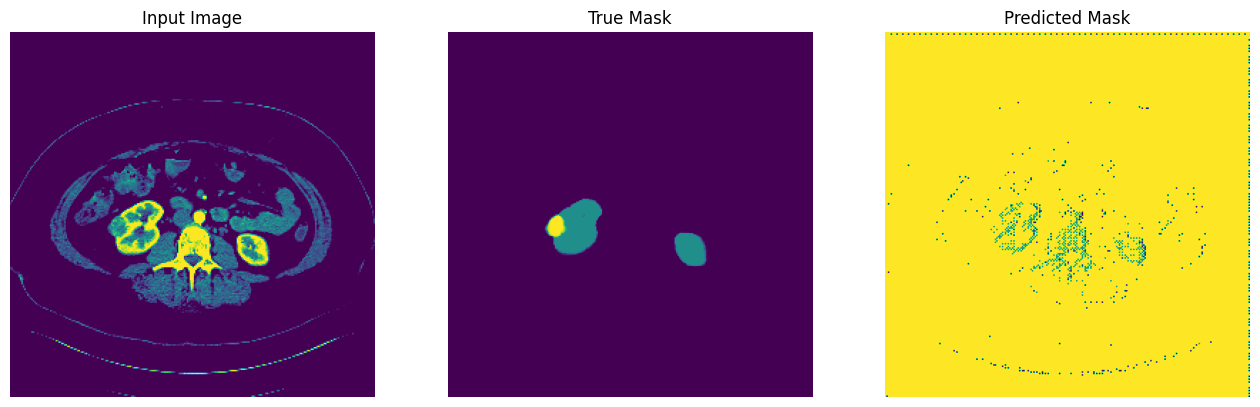

In [ ]:
def display_sample(display_list):
    plt.figure(figsize=(16, 16))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()
    
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1) 
    pred_mask = tf.expand_dims(pred_mask, axis=-1)
    return pred_mask
    
def show_predictions():
    one_img = sample_image[0][tf.newaxis, ...] 
    prediction = model.predict(one_img)
    pred_mask = create_mask(prediction)
    display_sample([sample_image[0], sample_mask[0], pred_mask[0]])
    
for image, mask in test_dataset.take(1):
    sample_image, sample_mask = image, mask

show_predictions()

In [52]:
test_steps = 15
custom_objects = {'dice_loss': dice_loss, 'dice_coef': dice_coef}
model_path = '/content/drive/MyDrive/files/model.h5'
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model(model_path)
result = model.evaluate(test_dataset, steps=test_steps)
dict(zip(model.metrics_names, result))

15/15 [==============================] - 92s 6s/step - loss: 0.9621 - dice_coef: 0.0379 - accuracy: 0.8375


{'loss': 0.9620851278305054,
 'dice_coef': 0.037914857268333435,
 'accuracy': 0.8375288248062134}